In [124]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import pandas_datareader as web
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

yf.pdr_override()

In [46]:
ESG_World_Index='INRG.MI'
positions = [ESG_World_Index,'IXC']
numAssets = len(positions)

start='01-01-2019'
end='01-01-2021'
data = pd.DataFrame(columns=positions)
source = 'yahoo'
for symbol in positions:
    data[symbol]=web.DataReader(symbol,data_source=source,start=start,end=end)['Adj Close']

In [47]:
data.rename(columns={"INRG": "Ishares Global Clean Energy ETF", "IXC": "Ishares Global Energy ETF"})


,INRG.MI,Ishares Global Energy ETF
Date,,
2019-01-02,4.2590,26.611357
2019-01-03,4.2040,26.477856
2019-01-04,4.2810,27.358967
2019-01-07,4.3090,27.617073
2019-01-08,4.3425,27.821774
...,...,...
2020-12-22,12.8300,20.049999
2020-12-23,13.1160,20.480000
2020-12-28,13.2240,20.370001


In [48]:
df_daily_returns = data.pct_change()
df_cum_returns = (df_daily_returns + 1).cumprod()

In [49]:
correlation = df_daily_returns.corr()
correlation
df_cum_returns.tail()

,INRG.MI,IXC
Date,,
2020-12-22,3.012444,0.753438
2020-12-23,3.079596,0.769596
2020-12-28,3.104954,0.765463
2020-12-29,3.042498,0.763208
2020-12-30,3.100728,0.770724


In [50]:
#plt.legend(histpriceconcat.columns)
#df_cum_returns.plot()
#ax1.set_xlabel("Date")
#ax1.set_ylabel("Growth of $1 investment")
#ax1.set_title("Netflix daily cumulative returns data")
#plt.legend(data.columns)
#plt.ylabel("Growth of £1")


In [51]:
Index_data= 'ESG Index Data Macro.xls'

In [52]:
MSCI_data=pd.read_excel(Index_data)


In [53]:
MSCI_data.head()

,Date,WORLD ESG Screened,MSCI All Country World Index
0,"Oct 31, 2007",103.203,427.629
1,"Nov 30, 2007",98.689,408.099
2,"Dec 31, 2007",97.190,403.246
3,"Jan 31, 2008",89.608,369.931
4,"Feb 29, 2008",88.835,370.407


In [54]:
MSCI_change = data.pct_change()
MSCI_cum_returns = ( MSCI_change + 1).cumprod()
MSCI_cum_returns.tail()
dat=['MSCI ACWI', 'MSCI ACWI ESG Screened']
MSCI_cum_returns.tail()

,INRG.MI,IXC
Date,,
2020-12-22,3.012444,0.753438
2020-12-23,3.079596,0.769596
2020-12-28,3.104954,0.765463
2020-12-29,3.042498,0.763208
2020-12-30,3.100728,0.770724


Text(0, 0.5, '£')

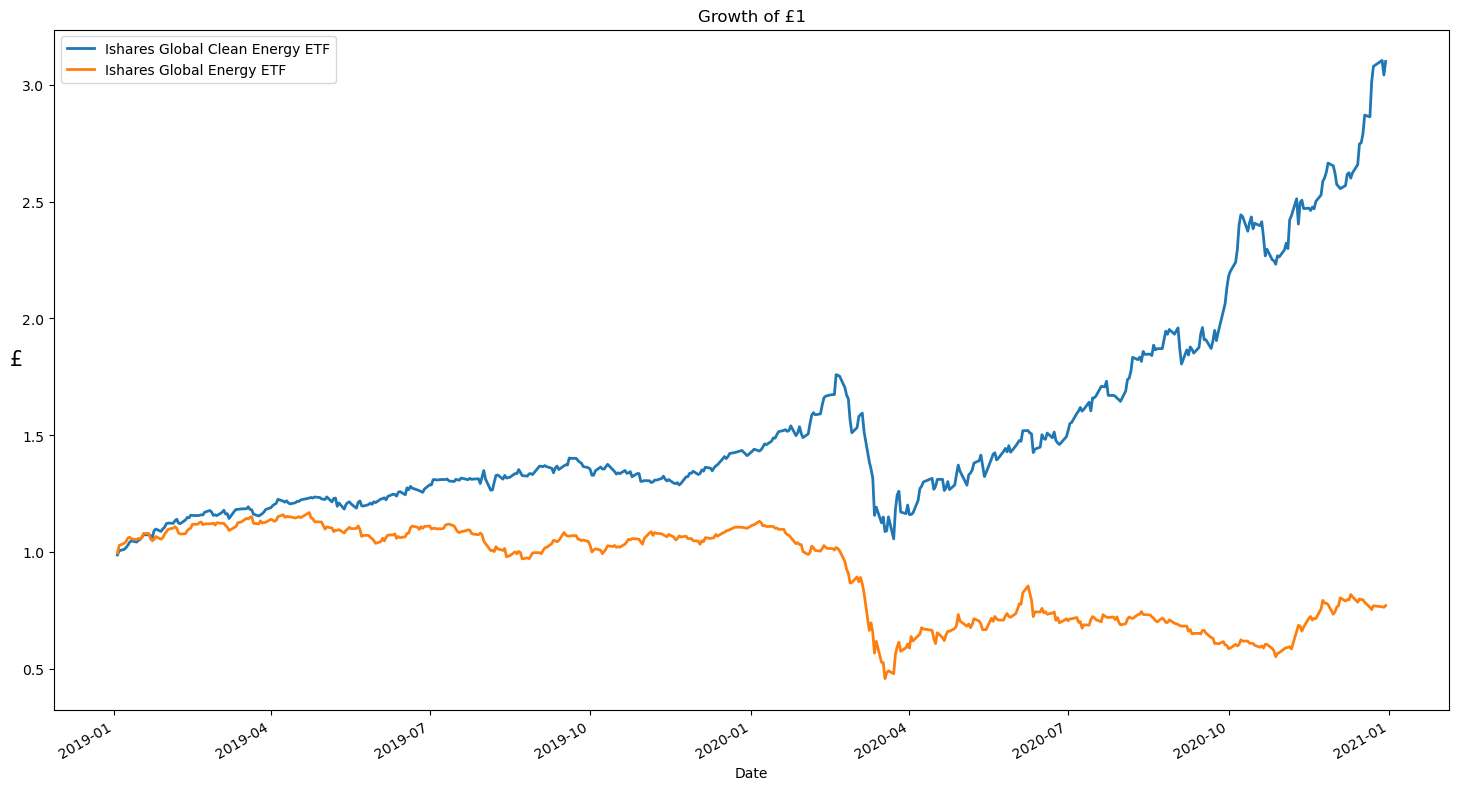

In [113]:
df_cum_returns.plot(linewidth=2, figsize= (18,10))
plt.style.use('default')
a=["Ishares Global Clean Energy ETF", "Ishares Global Energy ETF"]
plt.legend(a)
plt.xlabel("Date")
plt.ylabel('Growth of $1 investment', fontsize = 25)
plt.title("Growth of £1")
plt.ylabel('£', fontsize= 15,rotation=0)
#from matplotlib.dates import DateFormatter
#formatter = DateFormatter('%Y')
#plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

In [134]:
esg = web.DataReader(['INRG.MI','ACWI'] , data_source ='yahoo' ,start = '2020-01-01', end= '2021-01-01')['Adj Close']

In [135]:
esg.corr()

Symbols,INRG.MI,ACWI
Symbols,,
INRG.MI,1.000000,0.858918
ACWI,0.858918,1.000000
